In [1]:
import pandas as pd
import os

path = 'C:/Users/yasin/Desktop/COMP-309/Final Test'
file = 'AA3.csv'

fullpath = os.path.join(path, file)

df_fatimah = pd.read_csv(fullpath)

In [2]:
# Explore the data

# Print the names of columns
print(df_fatimah.columns.values)

# Print the types of columns
print(df_fatimah.dtypes)

# Print the unique values in each column.
for cols in df_fatimah.columns:
    unique = df_fatimah[cols].unique()
    print(unique)
    
# Print the statistics count, min, mean, standard deviation, 1st quartile, 
# median, 3rd quartile max of all the numeric columns(use one command).
print(df_fatimah.describe())

# Print the first three records.
print(df_fatimah.head(3))

# Print a summary of all missing values in all columns (use one command).
print(df_fatimah.isnull().sum())

# Print the total number (count) of each unique value in the following categorical columns: 
# Model
print(df_fatimah['model'].value_counts())

# Color
print(df_fatimah['color'].value_counts())

['model' 'type' 'year' 'millage' 'motor' 'value' 'damage' 'color' 'stolen']
model       object
type        object
year         int64
millage    float64
motor      float64
value        int64
damage      object
color       object
stolen       int64
dtype: object
['Ford' 'Toyota']
['sedan' 'SUV']
[2015 2016 2018 2017]
[64. 22. 28. 52. 30. 36. 43. nan 21. 15. 55. 35. 12. 63. 34. 32. 48. 38.
 23. 56. 18. 68. 41. 53. 31. 50. 40. 70. 19. 16. 10. 62. 29. 33. 39. 59.
 14. 54. 45. 27. 60. 20. 13. 57. 51. 67. 17. 75. 72. 66. 42.]
[ 2.  4. nan]
[16 23 25 19 21 34 32 17 33 31 46 18 29 27 37 22 36 39 28 26 14 38 20 24
 30]
['no damage' 'low damage' 'medium damage']
['white' 'black']
[0 1]
              year     millage      motor       value      stolen
count   107.000000  102.000000  18.000000  107.000000  107.000000
mean   2016.775701   37.254902   2.888889   25.504673    0.336449
std       1.048885   16.644618   1.022620    6.603849    0.474718
min    2015.000000   10.000000   2.000000   14.00000

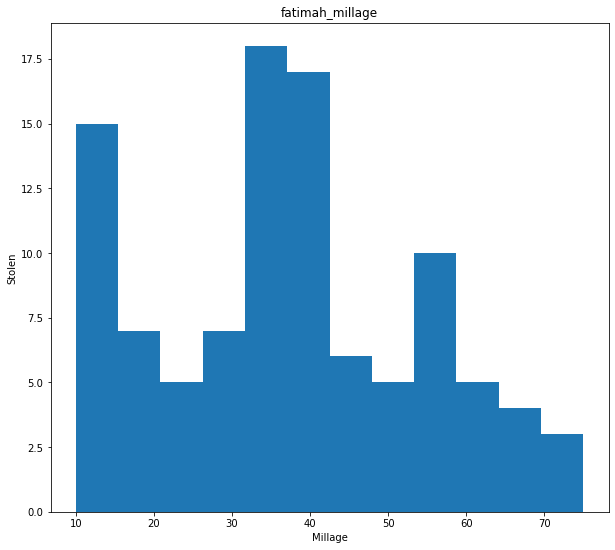

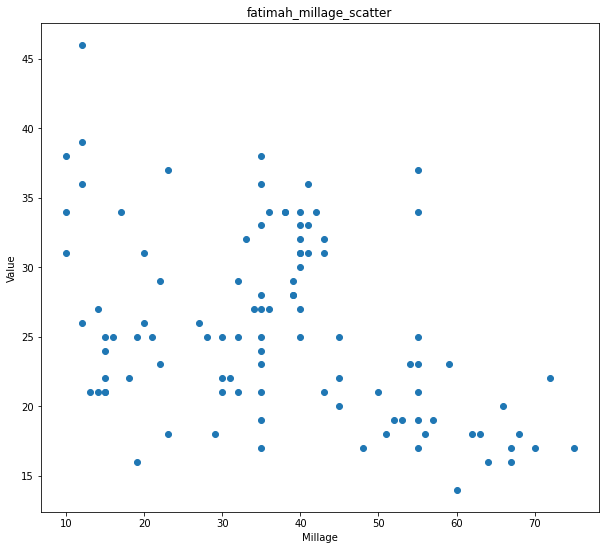

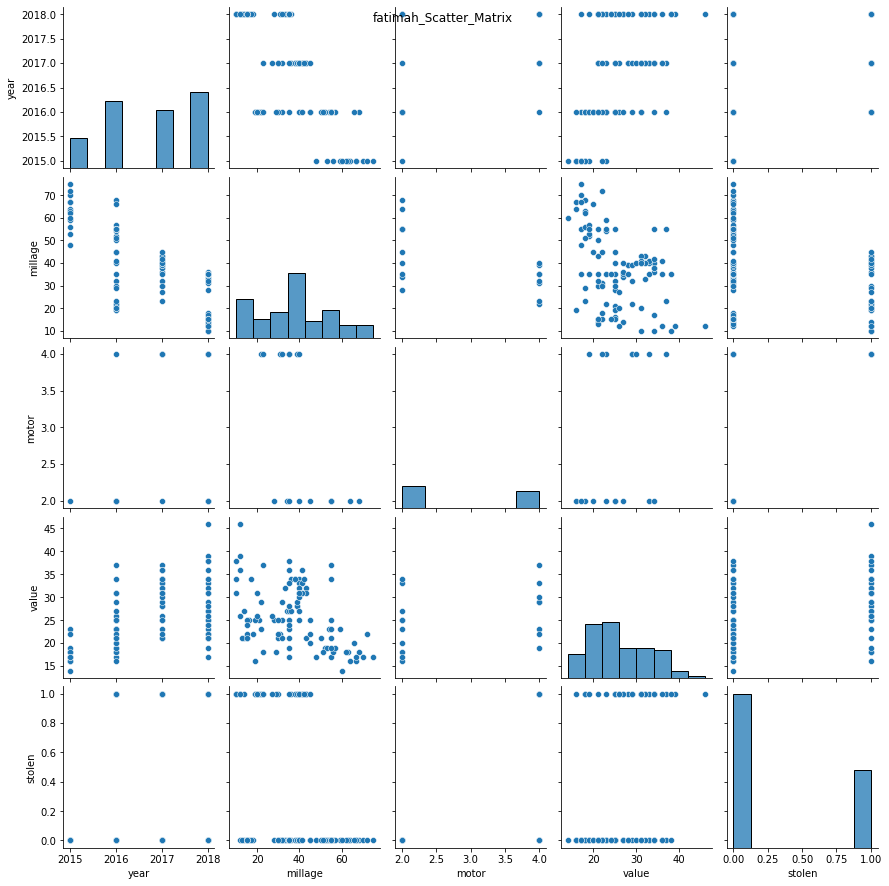

In [3]:
# Visualize the data 

# Plot a histogram for the millage use 12 bins, name the x and y axis’ 
# appropriately, give the plot a title "firstname_millage".
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.hist(df_fatimah['millage'], bins=12)
plt.title('fatimah_millage')
plt.xlabel('Millage')
plt.ylabel('Stolen')
plt.show()

# Create a scatterplot showing "millage" versus "value", name the x and y axis’
# appropriately, give the plot a title "firstname_millage_scatter".

plt.figure(figsize=(10,9))
plt.scatter(df_fatimah['millage'], df_fatimah['value'])
plt.title('fatimah_millage_scatter')
plt.xlabel('Millage')
plt.ylabel('Value')
plt.show()

# Plot a "scatter matrix" showing the relationship between all columns of the 
# dataset on the diagonal of the matrix plot the kernel density function.
import seaborn as sns

sns.pairplot(data=df_fatimah)
plt.suptitle('fatimah_Scatter_Matrix')
plt.show()

In [4]:
# Pre-process the data (15 marks)

# Remove (drop) properly the column with the most missing values. 
# (hint: make sure you review and set the right arguments)
print("Missing Values Before Pre-processing:")
print(df_fatimah.isnull().sum())

#the only column that has most missing value is 'motor'
df_fatimah = df_fatimah.drop(columns='motor')

# Replace the missing values in the "millage" column with the mean average of 
# the column value.  
df_fatimah['millage'].fillna(df_fatimah['millage'].mean(), inplace=True)

# Check that there are no missing values.
print("Missing Values After Pre-processing:")
print(df_fatimah.isnull().sum())


Missing Values Before Pre-processing:
model       0
type        0
year        0
millage     5
motor      89
value       0
damage      0
color       0
stolen      0
dtype: int64
Missing Values After Pre-processing:
model      0
type       0
year       0
millage    0
value      0
damage     0
color      0
stolen     0
dtype: int64


In [8]:
# Convert the all the categorical columns into numeric values and drop/delete 
# the original columns. (hint:  use get dummies) Make sure your new data frame
# is completely numeric, name it df_firstname_numeric.
# Specify categorical columns
# Specify categorical columns
# Specify categorical columns
cat_vars = ['model', 'type', 'damage', 'color']

# Iterate through each categorical column
for var in cat_vars:
    # Apply one-hot encoding with a custom suffix
    cat_list = pd.get_dummies(df_fatimah[var], prefix=var)
    
    # Drop the original categorical column
    df_fatimah = df_fatimah.drop(columns=[var])
    
    # Join the new columns to the original DataFrame
    df_fatimah = df_fatimah.join(cat_list)

# Extract column names after one-hot encoding
data1_vars = df_fatimah.columns.values.tolist()

# Create a list of columns to keep (excluding original categorical columns)
to_keep = [i for i in data1_vars if i not in cat_vars]

# Create the final DataFrame with only numeric columns
df_fatimah_numeric = df_fatimah[to_keep]

# Display the first few rows of the final numeric DataFrame
print(df_fatimah_numeric.head())

KeyError: 'model'

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features (X) and target variable (y)
columns = df_fatimah.columns.values.tolist()

X = df_fatimah[columns] 
Y = df_fatimah['stolen']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# Build the decision tree model
dt_fatimah = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=13, random_state=42)
dt_fatimah.fit(X_train, y_train)

# Validate using 6-fold cross-validation
cross_val_accuracy = cross_val_score(dt_fatimah, X_train, y_train, cv=6, scoring='accuracy')
print("Mean Accuracy on Validation Data:", cross_val_accuracy.mean())

# Test the model on the testing data
y_pred = dt_fatimah.predict(X_test)

# Print accuracy and confusion matrix
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy on Test Data:", test_accuracy)
print("\nConfusion Matrix:", conf_matrix)

# Save confusion matrix plot
plt.savefig("fatimah_screenshotAA3.png")

ValueError: could not convert string to float: 'SUV'

In [13]:
# Prune the tree: Vary the maximum depth of your predictive model from 1 to 8
# and print the mean accuracy of the k-flod of each run on the training data.

depths = list(range(1, 9))
mean_accuracies = []

for depth in depths:
    dt_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=13, random_state=42)
    accuracy = cross_val_score(dt_pruned, X_train, y_train, cv=6, scoring='accuracy').mean()
    mean_accuracies.append(accuracy)

# Print mean accuracies for different depths
for depth, accuracy in zip(depths, mean_accuracies):
    print(f"Depth: {depth}, Mean Accuracy: {accuracy}")

C:\Users\yasin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\base.py", line 

Depth: 1, Mean Accuracy: nan
Depth: 2, Mean Accuracy: nan
Depth: 3, Mean Accuracy: nan
Depth: 4, Mean Accuracy: nan
Depth: 5, Mean Accuracy: nan
Depth: 6, Mean Accuracy: nan
Depth: 7, Mean Accuracy: nan
Depth: 8, Mean Accuracy: nan


C:\Users\yasin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "C:\Users\yasin\anaconda3\lib\site-packages\sklearn\base.py", line 